<a href="https://colab.research.google.com/github/flame123-np/242-2567-820/blob/main/K_mean_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ค่าเฉลี่ยของแต่ละคลัสเตอร์


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
cluster,,,,,
0,5.901613,2.748387,4.393548,1.433871,1.225806
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.850000,3.073684,5.742105,2.071053,1.947368


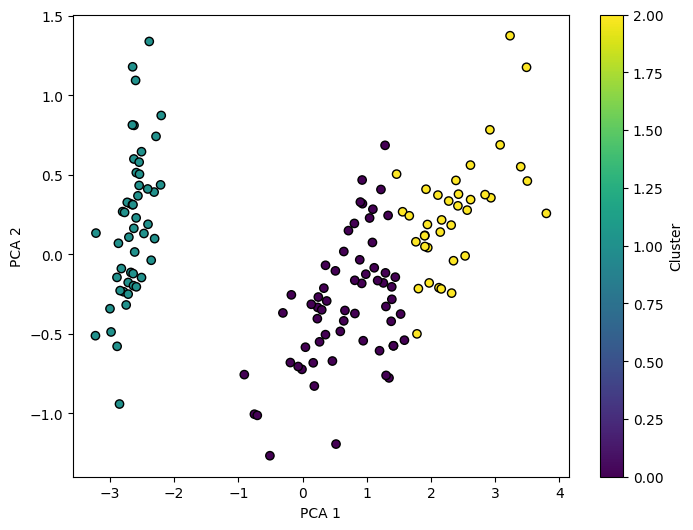

กลุ่มของข้อมูลใหม่: [0 2]


In [11]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# โหลดข้อมูล Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# แปลงข่อมูลเป็น DataFrame เพื่อดูข้อมูล
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# ใช้ K_Means Clustering แบ่งข้อมูลเป็น 3 กลุ่ม
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# แสดงค่าเฉลี่ยของแต่ละคลัสเตอร์
cluster_means = df.groupby('cluster').mean()
print('ค่าเฉลี่ยของแต่ละคลัสเตอร์')
display(cluster_means)

# ใช้ PCA เพื่อลดมิติของข้อมูลจาก 4 มิติ → 2 มิติ สำหรับการแสดงผล
pca = PCA(n_components=2)  # แก้ไข: n_componnents เป็น n_components
X_pca = pca.fit_transform(X)  # แก้ไข: X_pac เป็น X_pca

# แสดงผลลัพธ์ของการจัดกลุ่มเป็นกราฟ
plt.figure(figsize=(8, 6))  # แก้ไข: pit เป็น plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k')  # แก้ไข: X_pac เป็น X_pca, pit เป็น plt
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# ทดสอบข้อมูลใหม่
new_data = np.array([[5.5, 2.6, 4.4, 1.2],
                     [6.8, 3.2, 5.9, 2.3]])
# ทำนายกลุ่มของข้อมูลใหม่
predicted_cluster = kmeans.predict(new_data)
print('กลุ่มของข้อมูลใหม่:', predicted_cluster)

In [7]:
#ตรวจสอบว่าแต่ละคลัสเตอร์หมายถึงดอกไม้ชนิดใด
df.groupby('cluster')['target'].value_counts()

cluster  target
0        1         48
         2         14
1        0         50
2        2         36
         1          2
Name: count, dtype: int64

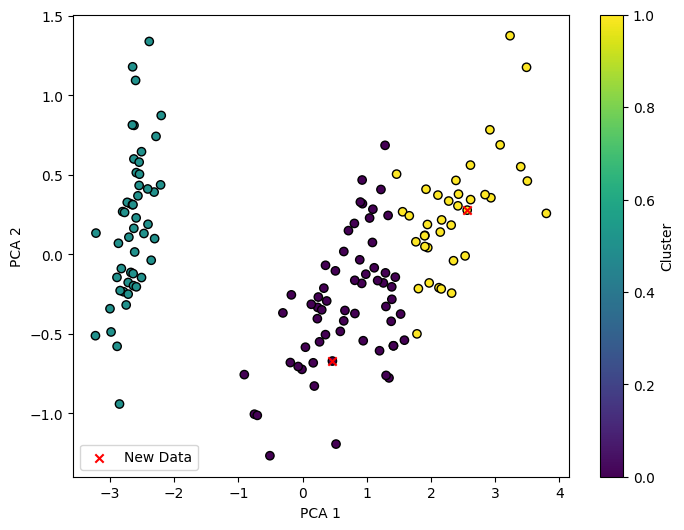

In [14]:
# ลดมิติของข้อมูลใหม่ด้วย PCA
new_data_pca = pca.transform(new_data)

# วาดการฟ K-Means clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k')
plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], c='red', marker='x', label='New Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()